In [11]:
import numpy as np
import scipy
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import resample
from scipy.spatial.distance import cdist

%matplotlib inline

## Read in data

In [2]:
video, recall = np.load('../../../data/processed/models_t100_v50_r10.npy')
video_events = np.load('../../../data/processed/video_events_wasserstein.npy')
recall_events = np.load('../../../data/processed/recall_events_wasserstein.npy')

In [3]:
def fit_exp_nonlinear(t, y):
    opt_parms, parm_cov = scipy.optimize.curve_fit(model_func, t, y, maxfev=1000)
    A, K, C = opt_parms
    return A, K, C

def model_func(t, A, K, C):
    return A * np.exp(-K * t) + C

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in multiply
  import sys


NameError: name 'i' is not defined

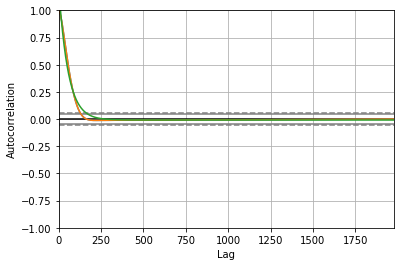

In [4]:
fig = pd.plotting.autocorrelation_plot(video)
data = fig.get_children()[5].get_data()
params = fit_exp_nonlinear(*data)
#data = (data[0][:250], data[1][:250])
plt.plot(*data, label = 'data')
plt.plot(data[0], model_func(data[0], *params), label = 'model')
plt.title('Autocorrelation and model fit for subject %d' % i)
plt.legend()
plt.show()
video_decay = params[1]

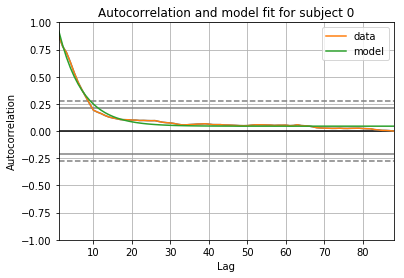

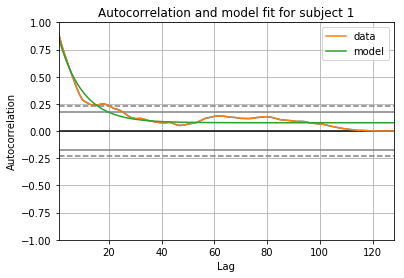

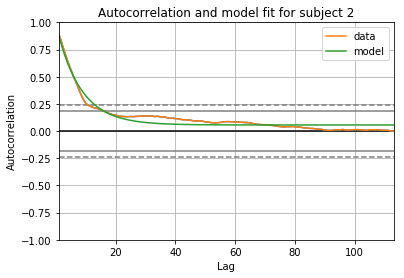

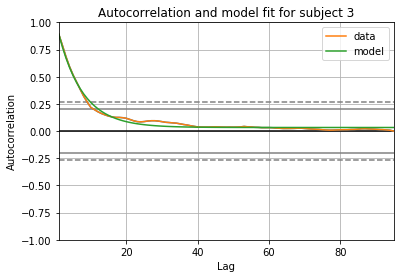

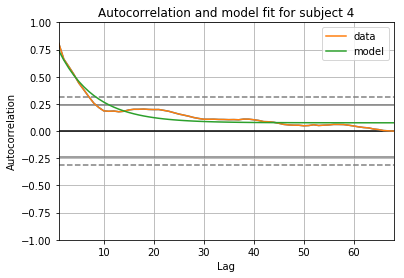

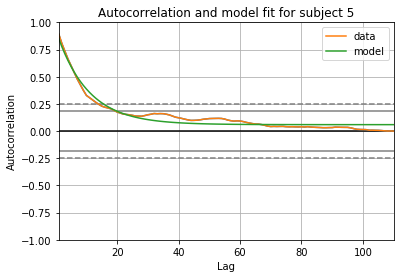

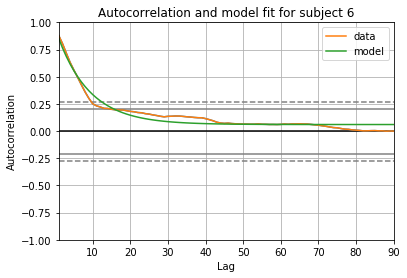

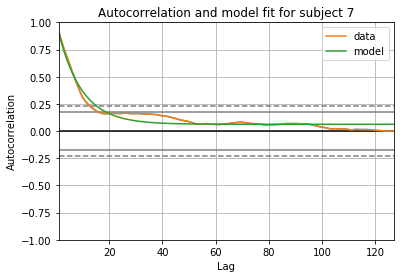

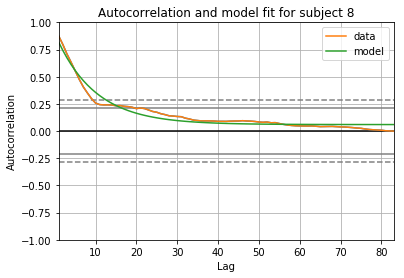

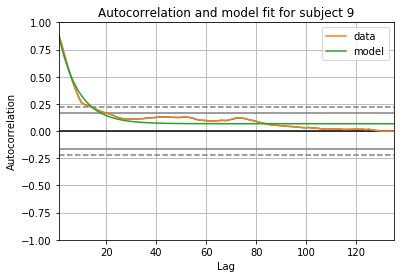

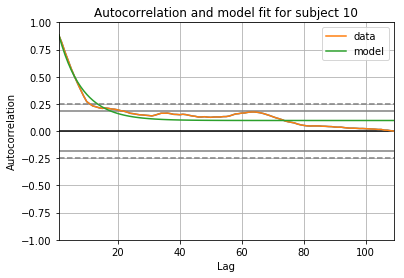

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


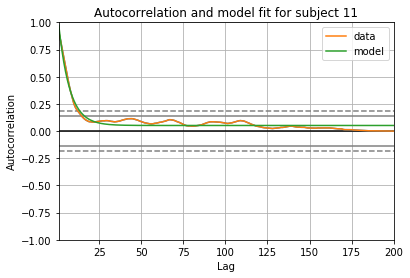

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in multiply
  import sys


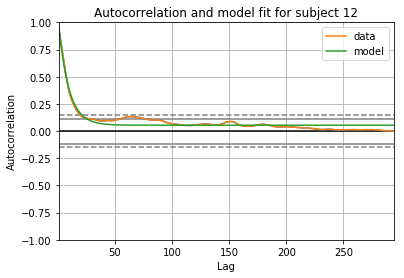

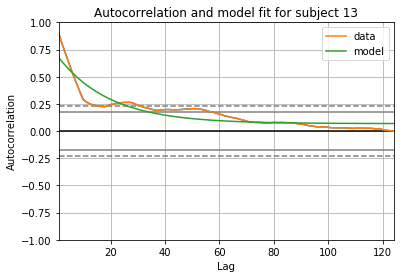

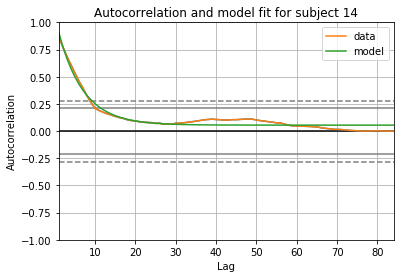

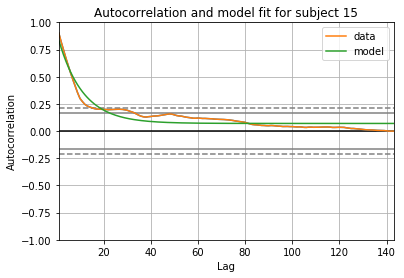

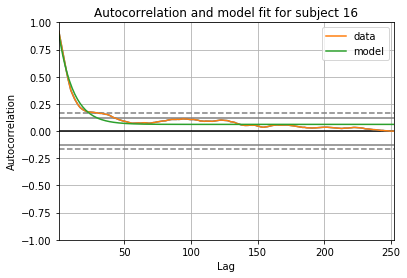

In [6]:
decay_params = []
for i, r in enumerate(recall):
    fig = pd.plotting.autocorrelation_plot(r)
    data = fig.get_children()[5].get_data()
    params = fit_exp_nonlinear(*data)
    #data = (data[0][:50], data[1][:50])
    plt.plot(*data, label = 'data')
    plt.plot(data[0], model_func(data[0], *params), label = 'model')
    plt.title('Autocorrelation and model fit for subject %d' % i)
    plt.legend()
    plt.show()
    decay_params.append(params[1])

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(-0.372382216210879, 0.1410277483958599)

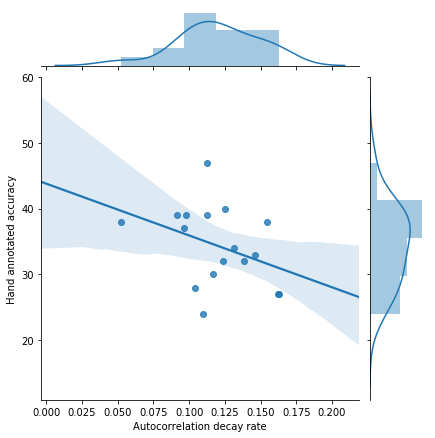

In [7]:
hand_rec = [27, 24, 32, 33, 32, 39, 30, 39, 28, 40, 34, 38, 47, 38, 27, 37, 39]
sns.jointplot(decay_params, hand_rec,  kind = 'reg', order = 1)
plt.xlabel('Autocorrelation decay rate')
plt.ylabel('Hand annotated accuracy')
scipy.stats.pearsonr(decay_params, hand_rec)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


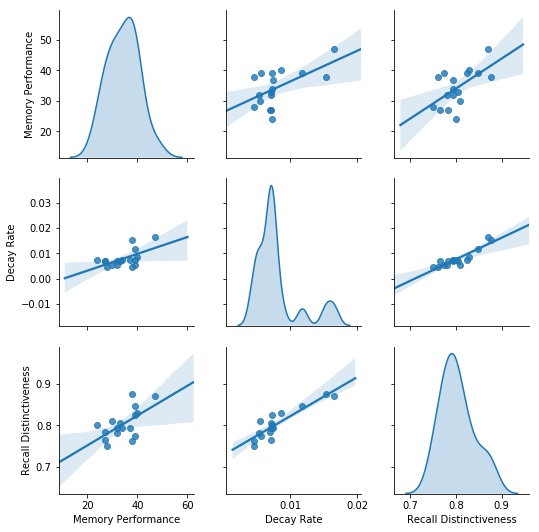

In [362]:
distinctiveness = [1 - np.triu(np.corrcoef(r)).mean() for r in recall_events]

df = pd.DataFrame(np.array([hand_rec, decay_params, distinctiveness]).T, columns=['Memory Performance', 'Decay Rate', 'Recall Distinctiveness'])
ax = sns.pairplot(df, diag_kind='kde', kind = 'reg')
plt.show()

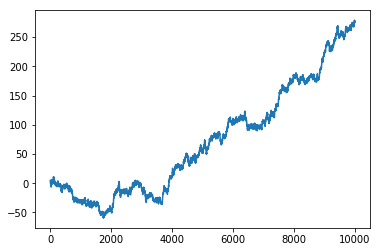

In [363]:
y = [np.random.randn()]
t = range(10000)
for i in t:
    y.append(y[-1] + np.random.randn())
plt.plot(t, y[1:])

/opt/conda/lib/python3.6/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/opt/conda/lib/python3.6/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]


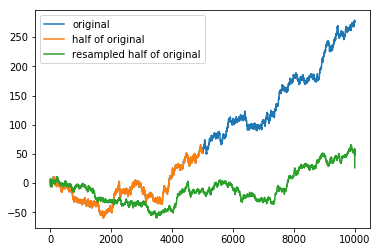

In [364]:
x1 = y[1:].copy()
x2 = y[1:int(len(y)/2)]
x3 = resample(x2, len(x1))
plt.plot(t, x1, label = 'original')
plt.plot(t[:int(len(y)/2)-1], x2, label = 'half of original')
plt.plot(t, x3, label = 'resampled half of original')
plt.legend()

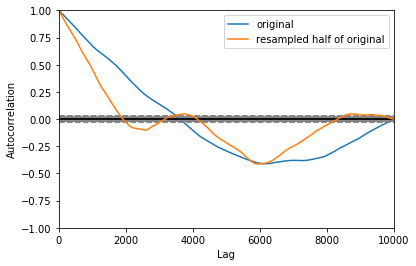

In [365]:
pd.plotting.autocorrelation_plot(x1, label = 'original')
pd.plotting.autocorrelation_plot(x3, label = 'resampled half of original')

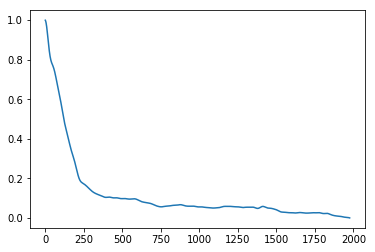

In [419]:
def autocorr(ts):
    
    def r(h):
        return ((data[:n - h] - mean) *
            (data[h:] - mean)).sum() / float(n) / c0


    n = len(ts)
    data = np.asarray(ts)
    mean = np.mean(data)
    c0 = np.sum((data - mean) ** 2) / float(n)
    x = np.arange(n) + 1
    y = list(map(r, x))
    return np.vstack([x, y]).T

ac = autocorr(recall[0])
plt.plot(ac[:, 0], ac[:, 1])

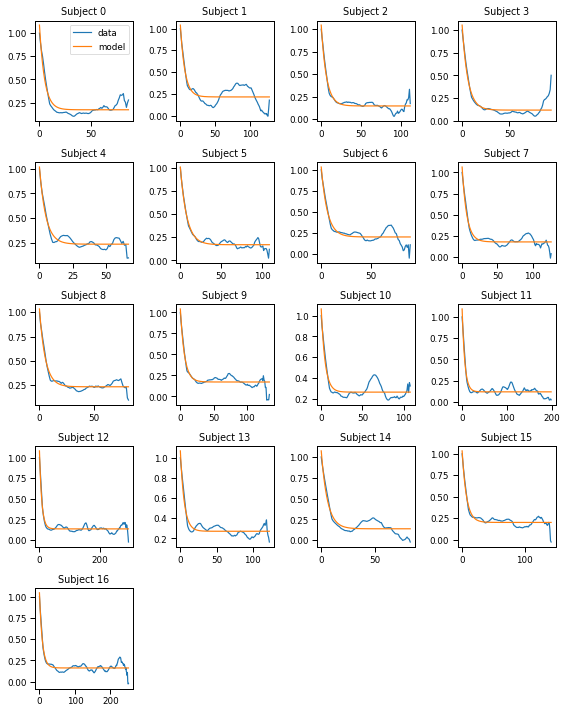

In [20]:
def autocorr2(r):
    
    def parse_diag(M):
        n = M.shape[1]
        x = np.nan * np.zeros([M.shape[0], 2 * n + 1])
        for i in np.arange(n):
            x[i, (n - i):n] = M[i, 0:i]
            x[i, n] = M[i, i]
            x[i, (n+1):(n + n - i)] = M[i, (i+1):]
        return pd.DataFrame(x, columns=np.arange(-n, n+1))
    
    M = pd.DataFrame(r).T.corr().values
    y = np.nanmean(parse_diag(M).loc[:, 0:].iloc[:, :-1].values, 0)
    return (np.arange(y.shape[0]), y)

sns.set_context('paper')
fig, axarr = plt.subplots(5, 4)
axarr = axarr.flatten()
fig.set_size_inches(8, 10)
cmap = plt.cm.bone_r
matplotlib.rcParams['pdf.fonttype'] = 42

decay_params = []
rms = []
for i, (ax, r) in enumerate(zip(axarr, recall)):
    data = autocorr2(r)
    params = fit_exp_nonlinear(*data)
    decay_params.append(params[1])
    rms.append(np.sqrt(np.mean(np.power(data[1] - model_func(data[0], *params), 2))))

    ax.plot(*data, label = 'data')
    ax.plot(data[0], model_func(data[0], *params), label = 'model')
    ax.set_title('Subject %d' % i)
    if i == 0:
        ax.legend()

axarr[17].axis('off')
axarr[18].axis('off')
axarr[19].axis('off')
plt.tight_layout()
plt.savefig("/mnt/decay_wasserstein.pdf")
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


SpearmanrResult(correlation=-0.5378511441095051, pvalue=0.025951237616653203)

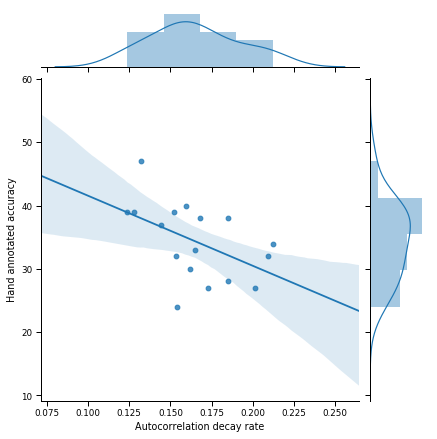

In [13]:
hand_rec = [27, 24, 32, 33, 32, 39, 30, 39, 28, 40, 34, 38, 47, 38, 27, 37, 39]
sns.jointplot(decay_params, hand_rec,  kind = 'reg', order = 0)
plt.xlabel('Autocorrelation decay rate')
plt.ylabel('Hand annotated accuracy')
scipy.stats.spearmanr(decay_params, hand_rec)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


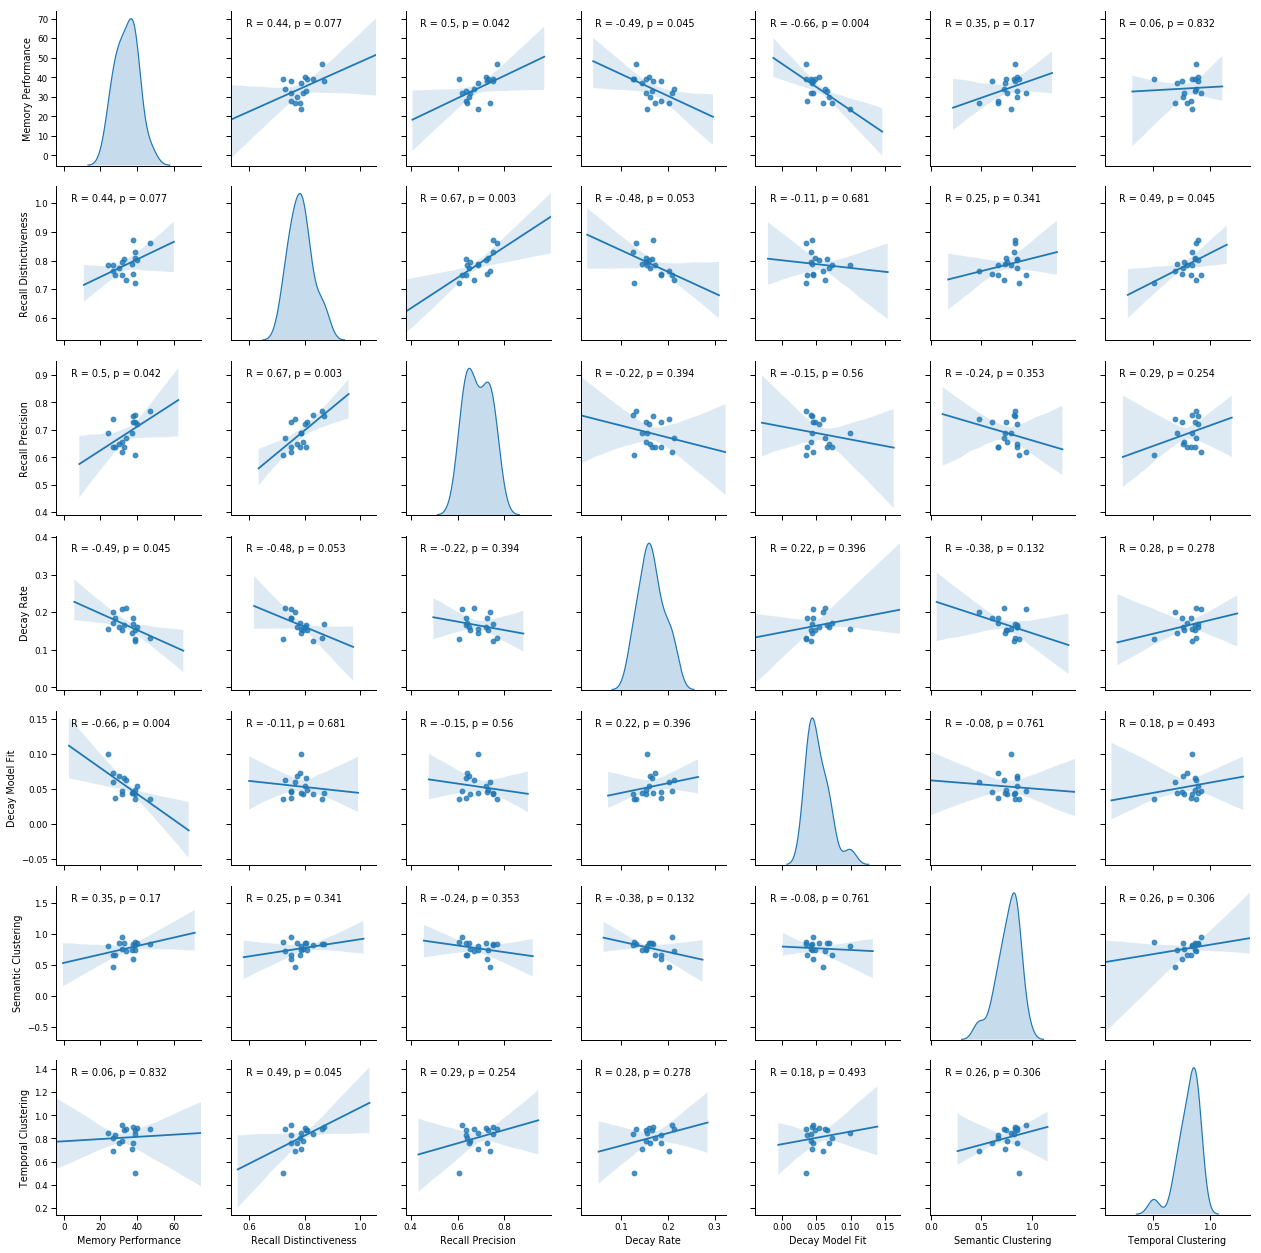

In [38]:
distinctiveness = [1 - np.triu(np.corrcoef(r)).mean() for r in recall_events]
precision = [np.max(1 - cdist(video_events, r, 'correlation'), 0).mean() for r in recall_events]
topics = finger.data['topics'].values
temporal = finger.data['temporal'].values
df = pd.DataFrame(np.array([hand_rec, distinctiveness, precision, decay_params, rms, topics, temporal]).T, columns=['Memory Performance', 'Recall Distinctiveness', 'Recall Precision', 'Decay Rate', 'Decay Model Fit', 'Semantic Clustering', 'Temporal Clustering'])
ax = sns.pairplot(df, diag_kind='kde', kind = 'reg')

def fmt_stat(stat):
    return "R = " + str(round(stat[0], 2)) + ", p = " + str(round(stat[1], 3))

def get_pos(axes, pos):
    x = axes.get_xlim()
    y = axes.get_ylim()
    return {
        'x' : x[0] + (x[1] - x[0])*pos,
        'y' : y[1] - (y[1] - y[0])*pos
    }

data = [hand_rec, distinctiveness, precision, decay_params, rms, topics, temporal]

for i, d in enumerate(data):
    for j in range(len(data)):
        if i != j:
            stat = scipy.stats.pearsonr(data[i], data[j])
            ax.axes[j][i].text(s = fmt_stat(stat), **get_pos(ax.axes[j][i], .1))
plt.savefig("/mnt/decay_corrs_wasserstein.pdf")
plt.show()

In [23]:
import quail

pres = [[[{'item' : i, 'topics' : m} for i, m in enumerate(video_events)]] for sub in range(17)]

rec = []
for r in recall_events:
    items = list(np.argmax(1 - cdist(video_events, r), 0).astype(int))
    rec.append([[{'item' : item, 'topics' : t} for item, t in zip(items, r)]])
    
egg = quail.Egg(pres=pres, rec=rec)
egg.info()

Number of subjects: 17
Number of lists per subject: 1
Number of words per list: 20
Date created: Wed Feb  6 14:44:24 2019
Meta data: {}


In [24]:
finger = egg.analyze('fingerprint')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


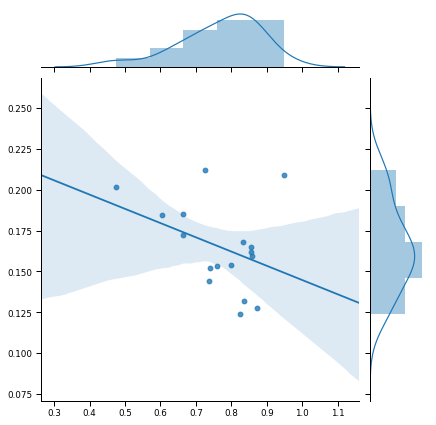

In [36]:
sns.jointplot(finger.data['topics'].values, decay_params, kind = 'reg')

In [34]:
finger.data

TypeError: __init__() got an unexpected keyword argument 'max_rows'

                topics  temporal
Subject List                    
0       0     0.474793  0.694481
1       0     0.797709  0.844341
2       0     0.758949  0.776876
3       0     0.855543  0.873964
4       0     0.947368  0.921053
5       0     0.871053  0.505263
6       0     0.856628  0.762573
7       0     0.740556  0.871316
8       0     0.664474  0.832895
9       0     0.858016  0.894480
10      0     0.726901  0.879240
11      0     0.833577  0.901123
12      0     0.835062  0.879023
13      0     0.603581  0.756845
14      0     0.662486  0.802492
15      0     0.735882  0.710817
16      0     0.823219  0.840482